This is currently under construction.

This notebook contains the functions that are called inside the rubix pipeline.

# Config

contains all the information needed to run the pipeline. Those are run specfic configurations.

In [3]:
import os
config = {
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        "overwrite": True
        },
        "subset": {
            "use_subset": True,
            "subset_size": 1000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE"},
        
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1}

        
}

In [4]:
# NBVAL_SKIP
from rubix.core.data import convert_to_rubix, prepare_input

convert_to_rubix(config) # Convert the config to rubix format and store in output_path folder
#for gas and stars
#coords, vel, metalicity, mass, age, halfmass_r, gas_coords, gas_vel, gas_metallicity, gas_mass, gas_density, gas_sfr, gas_internal_energy, gas_electron_abundance = prepare_input(config) # Prepare the input for the pipeline
#for gas only
#gas_coords, gas_vel, gas_metallicity, gas_mass, gas_density, gas_hsml, gas_sfr, gas_internal_energy, gas_electron_abundance, gas_metals, halfmass_r = prepare_input(config) # Prepare the input for the pipeline
#for stars only
#
coords, vel, metalicity, mass, age, halfmass_r = prepare_input(config) # Prepare the input for the pipeline
print(prepare_input(config))

2024-06-21 00:56:46,474 - rubix - INFO - Rubix galaxy file already exists, skipping conversion


RubixData(galaxy=Galaxy(redshift=None, center=None, halfmassrad_stars=None), stars=StarsData(coords=None, mass=None, velocity=None, metallicity=None, age=None), gas=GasData(coords=None, density=None, mass=None, metallicity=None, sfr=None, internal_energy=None, velocity=None, electron_abundance=None))
{'galaxy': Galaxy(redshift=None, center=None, halfmassrad_stars=None), 'stars': StarsData(coords=None, mass=None, velocity=None, metallicity=None, age=None), 'gas': GasData(coords=None, density=None, mass=None, metallicity=None, sfr=None, internal_energy=None, velocity=None, electron_abundance=None)}
Galaxy(redshift=None, center=None, halfmassrad_stars=None)
This are the stars
StarsData(coords=None, mass=None, velocity=None, metallicity=None, age=None)
Done


2024-06-21 00:56:48,198 - rubix - WARNING - The Subset value is set in config. Using only subset of size 1000


RubixData(galaxy=Galaxy(redshift=None, center=None, halfmassrad_stars=None), stars=StarsData(coords=None, mass=None, velocity=None, metallicity=None, age=None), gas=GasData(coords=None, density=None, mass=None, metallicity=None, sfr=None, internal_energy=None, velocity=None, electron_abundance=None))
{'galaxy': Galaxy(redshift=None, center=None, halfmassrad_stars=None), 'stars': StarsData(coords=None, mass=None, velocity=None, metallicity=None, age=None), 'gas': GasData(coords=None, density=None, mass=None, metallicity=None, sfr=None, internal_energy=None, velocity=None, electron_abundance=None)}
Galaxy(redshift=None, center=None, halfmassrad_stars=None)
This are the stars
StarsData(coords=None, mass=None, velocity=None, metallicity=None, age=None)
Done


2024-06-21 00:56:48,720 - rubix - WARNING - The Subset value is set in config. Using only subset of size 1000


(array([[ -8.35817233,   0.3416457 ,  10.20366487],
       [  1.06628383,  -1.49286917,  -0.27716144],
       [  2.04225495, -13.07657674,   3.53097812],
       ...,
       [ -5.52533175,  -0.27240021,   9.43913371],
       [ -6.50614468,  10.23248936,   1.33017453],
       [-18.60511272,   5.80675187,   9.56518098]]), Array([[-1.5355250e-15, -4.5847776e-15, -4.9232096e-16],
       [ 1.4683807e-15,  2.7118653e-15, -5.5884811e-15],
       [ 4.7336800e-15, -1.3261995e-17, -4.2374483e-15],
       ...,
       [ 1.7550438e-15, -4.2094268e-15, -1.7362481e-17],
       [-1.4768257e-15, -2.2087672e-15,  4.3089320e-15],
       [ 5.0407778e-16, -3.4783628e-15,  4.1021882e-15]], dtype=float32), array([0.0286061 , 0.05940829, 0.01147904, 0.01518066, 0.02302478,
       0.03796995, 0.00721189, 0.00819671, 0.02696642, 0.01445697,
       0.0124571 , 0.02768049, 0.01132925, 0.00619345, 0.06289906,
       0.01608112, 0.00661429, 0.01675232, 0.01973801, 0.06008982,
       0.01473267, 0.01257462, 0.0027496

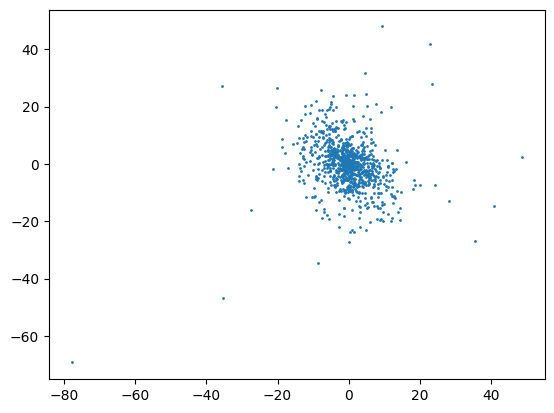

In [6]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
# Make a scatter plot 
n_subset = 10000
subset = coords[:n_subset]

plt.scatter(subset[:,0], subset[:,1], s=1)


Get the function that does the binning

In [6]:
# NBVAL_SKIP
from rubix.core.telescope import get_spatial_bin_edges,get_spaxel_assignment

In [15]:
# NBVAL_SKIP
bin_particles = get_spaxel_assignment(config)
edges = get_spatial_bin_edges(config)

/home/annalena/rubix/rubix/telescope/factory.py:20: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


In [16]:
# NBVAL_SKIP
# Make a scatter plot of the spaxels
spaxel_index = bin_particles(coords)

print("Shape of spaxel_index", spaxel_index.shape)

Shape of spaxel_index (1000,)


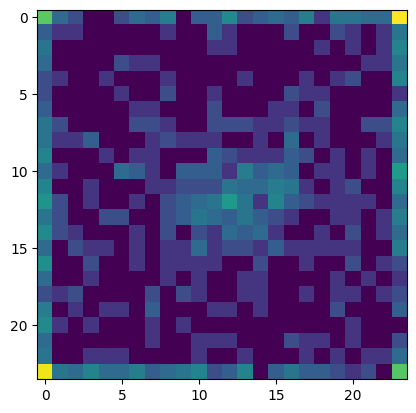

In [17]:
# NBVAL_SKIP
# Calculate binned image


spatial_bin_edges = edges
pixel_assignments = spaxel_index
import numpy as np
image = np.zeros((len(spatial_bin_edges) - 1, len(spatial_bin_edges) - 1))

# Count the number of particles in each pixel
for i in range(len(spatial_bin_edges) - 1):
    for j in range(len(spatial_bin_edges) - 1):
        image[i, j] = np.sum(pixel_assignments == (i + (len(spatial_bin_edges) - 1) * j))

image = np.log10(image + 1)
plt.imshow(image, cmap="viridis")